In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv('zomato.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
X = data[['Open', 'High', 'Low', 'Volume']]  # Using 'Open', 'High', 'Low', and 'Volume' as features

# Declare dependent variable (target)
y = data['Close']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression()

In [11]:
predictions=model.predict(X_test)

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
accuracy_model = model.score(X_test, y_test)
print(f"Accuracy: {accuracy_model:.2f}")

Accuracy: 1.00


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming model is already trained and X_train, y_train are available

# Initialize the model (Linear Regression for example)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Function to predict close value
def predict_close(open_val, high_val, low_val, volume_val):
    # Reshape input values into a numpy array
    input_data = np.array([[open_val, high_val, low_val, volume_val]])
    
    # Make prediction
    close_prediction = model.predict(input_data)
    
    return close_prediction[0]

# Example usage
open_val = 182
high_val = 190
low_val = 175
volume_val = 886920

predicted_close = predict_close(open_val, high_val, low_val, volume_val)
print("Predicted Close Value:", predicted_close)


Predicted Close Value: 182.7861279727307


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


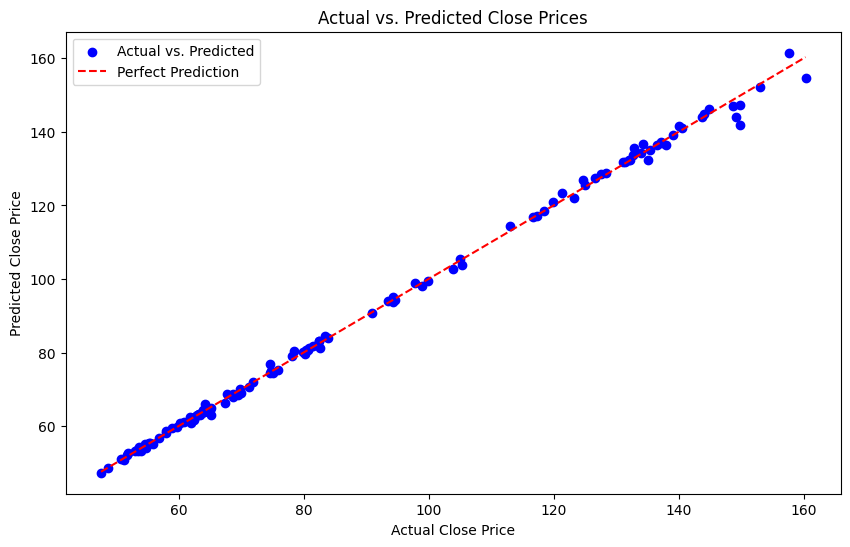

In [16]:
import matplotlib.pyplot as plt

# Plotting predicted vs. actual close prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


In [17]:
import joblib

# Assuming 'model' is your trained model
# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']